# Data Analysis 4
## In this analysis we will find a list of order quantity by product and order date

First we connect to the cloud database, run an SQL query for the necessary data and store it in pandas dataframes.
This analysis requires three tables: ``SalesOrderHeader``, ``SalesOrderDetail`` and ``Product``. We could join the tables in a single SQL query, but for simplicity's sake let's merge them with pandas.

In [1]:
import pandas.io.sql as sqlio
import psycopg2
from config import config

params = config()
conn = psycopg2.connect(**params)
sql1 = 'SELECT * FROM \"SalesOrderHeader\";'
sql2 = 'SELECT * FROM \"SalesOrderDetail\";'
sql3 = 'SELECT * FROM \"Product\";'
salesOrderHeader = sqlio.read_sql_query(sql1, conn)
salesOrderDetail = sqlio.read_sql_query(sql2, conn)
product = sqlio.read_sql_query(sql3, conn)
conn.close()

Let's inspect the dataframes.

In [2]:
from IPython.display import display

display(salesOrderHeader.head(3))
display(salesOrderDetail.head(3))
display(product.head(3))

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43659,PO522145787,10-4020-000676,...,16281,105041Vi84182,None,20565.6206,1971.5149,616.0984,23153.2339,None,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43660,PO18850127500,10-4020-000117,...,5618,115213Vi29411,None,1294.2529,124.2483,38.8276,1457.3288,None,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43661,PO18473189620,10-4020-000442,...,1346,85274Vi6854,4,32726.4786,3153.7696,985.5530,36865.8012,None,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07


,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,2011-05-31
1,43659,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,2011-05-31
2,43659,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,2011-05-31


,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,None,1000,750,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,None,1000,750,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
2,3,BB Ball Bearing,BE-2349,True,False,None,800,600,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08 10:01:36.827


Now let's merge them with pandas.

In [3]:
import pandas as pd

df1 = pd.merge(salesOrderHeader, salesOrderDetail, how = "inner", on = 'SalesOrderID', suffixes = ('_soh', '_sod'))
df1 = pd.merge( df1, product, how = "inner", on = 'ProductID', suffixes = ('', '_p'))

Here is the resulting dataframe.

In [4]:
display(df1.head(3))

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43659,PO522145787,10-4020-000676,...,M,H,U,1.0,19.0,2011-05-31,2012-05-29,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827
1,43661,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43661,PO18473189620,10-4020-000442,...,M,H,U,1.0,19.0,2011-05-31,2012-05-29,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827
2,43665,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43665,PO16588191572,10-4020-000146,...,M,H,U,1.0,19.0,2011-05-31,2012-05-29,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827


Most of the columns we have right now will not be necessary, so let's drop them.

In [5]:
df2 = df1[['ProductID', 'OrderQty', 'OrderDate']]

Let's inspect the resulting dataframe.

In [6]:
display(df2.head(3))

,ProductID,OrderQty,OrderDate
0,776,1,2011-05-31
1,776,4,2011-05-31
2,776,1,2011-05-31


From this dataframe we will create two new ones. The first, ``ordQtPrd``, will store the total number of orders for each product. The second, ``ordQtDt`` will store the total number of orders for each date.

In [7]:
ordQtPrd = df2.groupby(by = ['ProductID']).sum().reset_index()
ordQtDt = df2.groupby(by = ['OrderDate']).sum().reset_index().drop(columns='ProductID')

The results are as follows.

In [8]:
display(ordQtPrd)
display(ordQtDt)

,ProductID,OrderQty
0,707,6266
1,708,6532
2,709,1107
3,710,90
4,711,6743
...,...,...
261,994,378
262,996,543
263,997,656
264,998,1556


,OrderDate,OrderQty
0,2011-05-31,825
1,2011-06-01,4
2,2011-06-02,5
3,2011-06-03,2
4,2011-06-04,5
...,...,...
1119,2014-06-26,65
1120,2014-06-27,82
1121,2014-06-28,68
1122,2014-06-29,61


Next we will plot two graphs. A chart showing us how much each product has been ordered and a chart showing us an order history in a timeline.

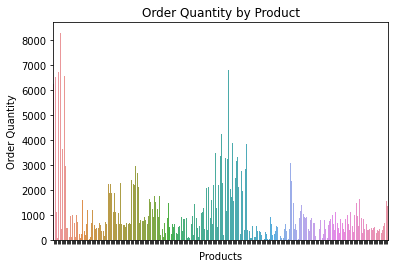

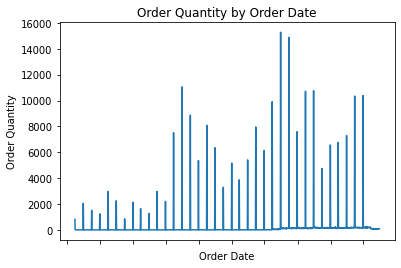

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


g1 = sns.barplot(x = 'ProductID', y = 'OrderQty', data = ordQtPrd)
g1.set(title = 'Order Quantity by Product', xlabel = 'Products', ylabel = 'Order Quantity', xticklabels = [])
plt.show()
plt.clf()

g2 = sns.lineplot(x = 'OrderDate', y = 'OrderQty', data = ordQtDt)
g2.set(title = 'Order Quantity by Order Date', xlabel = 'Order Date', ylabel = 'Order Quantity', xticklabels = [])
plt.show()

Finally, let's save the resulting dataframe to a ``.csv`` file.

In [10]:
df2.to_csv('results/analysis4.csv')